## Avocado dataset

* Date - The date of the observation.
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

# Q10 : Create a simple dash with the following:

**1- The Dash should be interactive and contains at least 1 component**

**2- It should reflect the volume as well as the Average Price for each region during all months in diffrent years**




In [60]:
import pandas as pd
import numpy as np
from dash import Dash, html,dcc,callback
import plotly.express as px
from dash.dependencies import Input, Output


In [61]:
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [62]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [63]:
#app = Dash()



In [64]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [66]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Month_Name']=df['Date'].dt.month_name()
df['DAY']=df['Date'].dt.day
df['DAY_Name']=df['Date'].dt.day_name()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int32         
 14  Month_Name    18249 non-null  object        
 15  DAY           18249 non-null  int32 

In [68]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month Month_Name  DAY DAY_Name  
0  Albany     12   December   27   Sunday  
1  Albany     12   December   20   Sunday  
2  Albany     12   December   13   Sunday  
3  Albany     12   December    6   Sunday  
4  Albany     11   November   29   Sunday

In [124]:
df2=df.groupby('year')[ 'Total Volume'].sum().reset_index()
df3 = df.groupby('year')['type'].first().reset_index()
df4=pd.merge(df2,df3,how='inner',on ='year')
df4

year  Total Volume          type
0  2015  4.385469e+09  conventional
1  2016  4.820890e+09  conventional
2  2017  4.934306e+09  conventional
3  2018  1.382738e+09  conventional

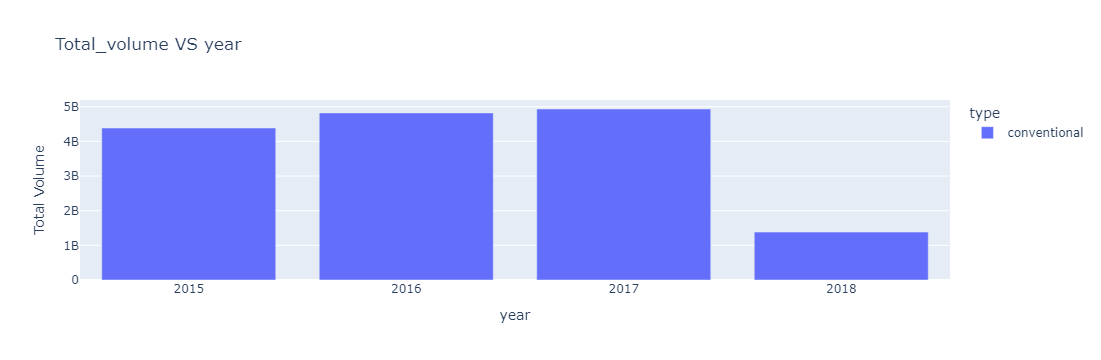

In [138]:
fig01=px.bar(df4,x='year',y='Total Volume',color='type',title='Total_volume VS year')
fig01.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2015, 2016, 2017, 2018]
    )
)

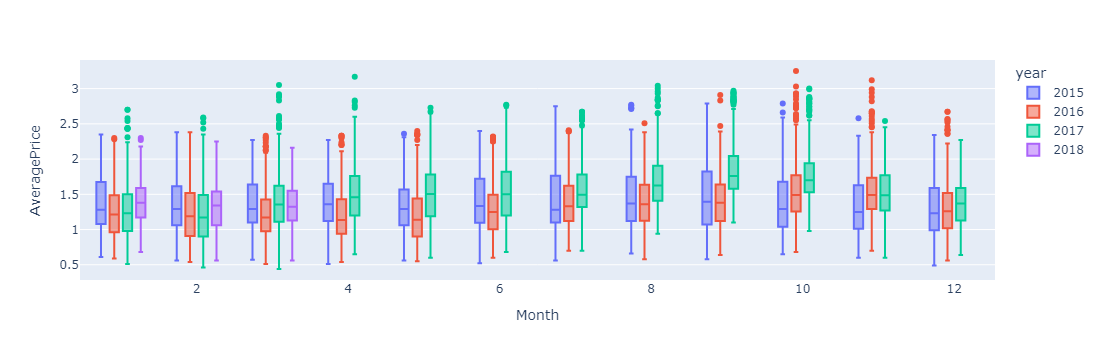

In [142]:
fig02 = px.box(df,x ='Month',y ='AveragePrice',color = 'year')
fig02

In [ ]:
df4=df.groupby(['year','Month'])['AveragePrice'].sum().reset_index()
px.line(df4,x='Month',y='AveragePrice',color='year')

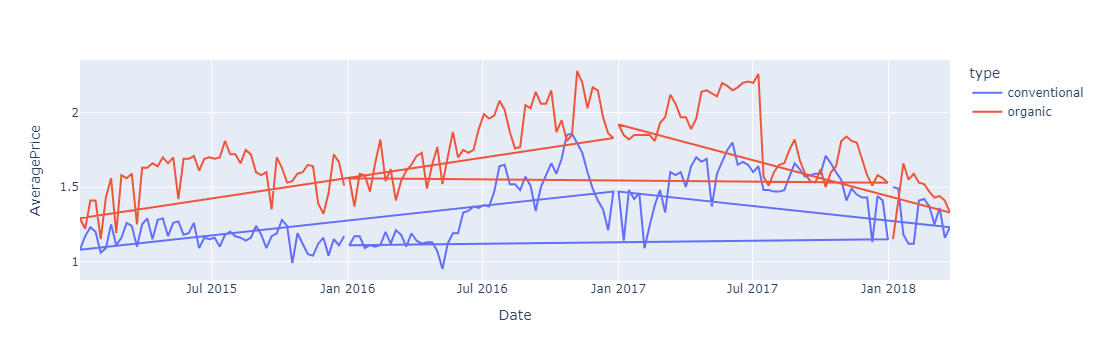

In [150]:
data_reg =df[df['region'] == 'BaltimoreWashington']
fig03=px.line(df[df['region'] == 'BaltimoreWashington'],x = 'Date',y = 'AveragePrice',color = 'type')
fig03

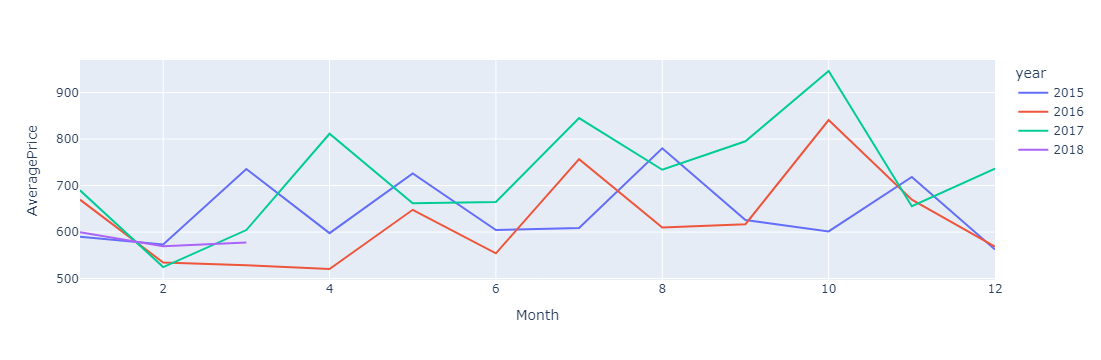

In [148]:
df4=df.groupby(['year','Month'])['AveragePrice'].sum().reset_index()
fig04=px.line(df4,x='Month',y='AveragePrice',color='year')
fig04

In [152]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [154]:
x =1
my_option = []
for i in df['region'].unique():
    my_option.append({'label':i,'value':str(x)})
    x+= 1
my_option

[{'label': 'Albany', 'value': '1'},
 {'label': 'Atlanta', 'value': '2'},
 {'label': 'BaltimoreWashington', 'value': '3'},
 {'label': 'Boise', 'value': '4'},
 {'label': 'Boston', 'value': '5'},
 {'label': 'BuffaloRochester', 'value': '6'},
 {'label': 'California', 'value': '7'},
 {'label': 'Charlotte', 'value': '8'},
 {'label': 'Chicago', 'value': '9'},
 {'label': 'CincinnatiDayton', 'value': '10'},
 {'label': 'Columbus', 'value': '11'},
 {'label': 'DallasFtWorth', 'value': '12'},
 {'label': 'Denver', 'value': '13'},
 {'label': 'Detroit', 'value': '14'},
 {'label': 'GrandRapids', 'value': '15'},
 {'label': 'GreatLakes', 'value': '16'},
 {'label': 'HarrisburgScranton', 'value': '17'},
 {'label': 'HartfordSpringfield', 'value': '18'},
 {'label': 'Houston', 'value': '19'},
 {'label': 'Indianapolis', 'value': '20'},
 {'label': 'Jacksonville', 'value': '21'},
 {'label': 'LasVegas', 'value': '22'},
 {'label': 'LosAngeles', 'value': '23'},
 {'label': 'Louisville', 'value': '24'},
 {'label': 'M

In [162]:
app = Dash()
app.layout = html.Div([
    
    html.H1('Avogado across the us'),
    dcc.Graph(id = 'hist',figure=fig01),
    dcc.Dropdown(id = 'dropdown',
        options=my_option),
   dcc.Graph(id ='gragh'),
   dcc.Graph(id ='box',figure=fig02)

])
@callback(

  Output('gragh','figure'),
    Input(component_id='dropdown',component_property='value')

)
def display_graph(value):
    for i in range(1,55):
        
        if value == str(i):
            #c = str(i)
            dff = df[df['region'] == my_option[i-1]['label']]
    return px.line(dff,x = 'Date',y = 'AveragePrice',color = 'type')
    
app.run_server(port =8051)